In [29]:
%pylab inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import joblib
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2)

sgd_pred = joblib.load('/Z/personal-folders/interns/saket/github/pywsi/scripts/sgd_val_pred.joblib.pickle')
sgd_prob = joblib.load('/Z/personal-folders/interns/saket/github/pywsi/scripts/sgd_val_prob.joblib.pickle')
sgd_true = joblib.load('/Z/personal-folders/interns/saket/github/pywsi/scripts/sgd_val_true.joblib.pickle')

validation_prob = joblib.load('/Z/personal-folders/interns/saket/github/pywsi/pickles/random_forest_valid_prob.joblib.pickle')
validation_true = joblib.load('/Z/personal-folders/interns/saket/github/pywsi/pickles/random_forest_valid_true.joblib.pickle')
#joblib.dump(validation_acc, '/Z/personal-folders/interns/saket/github/pywsi/pickles/random_forest_valid_acc.joblib.pickle')



Populating the interactive namespace from numpy and matplotlib


In [22]:
average_precision = average_precision_score(sgd_true, sgd_prob)
precision, recall, _ = precision_recall_curve(sgd_true, sgd_prob)

In [25]:
average_precision_rf = average_precision_score(validation_true, validation_prob)
precision_rf, recall_rf, _ = precision_recall_curve(validation_true, validation_prob)

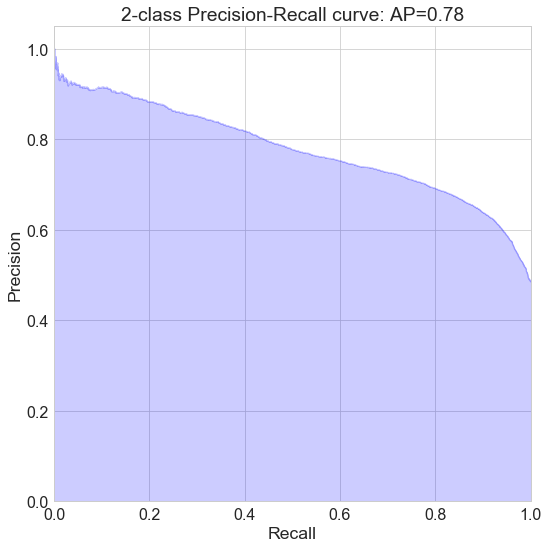

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, color='b', alpha=0.2,
         where='post')
ax.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/8Conv_sgd_PRAUC.pdf')

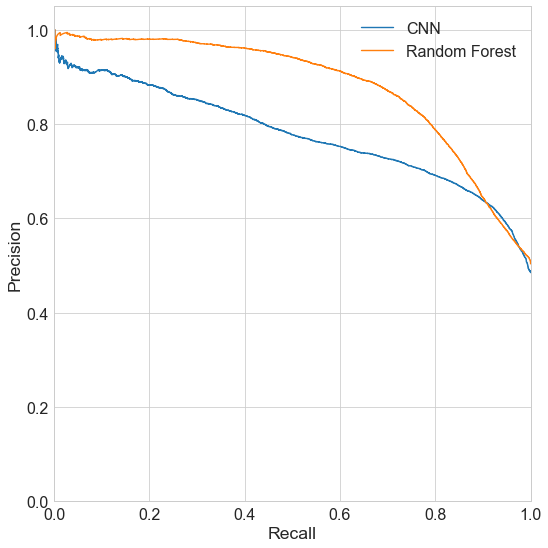

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, alpha=1,
         where='post', label='CNN')

ax.step(recall_rf, precision_rf, alpha=1,
         where='post', label='Random Forest')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
#ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/RF_vs_8Conv_sgd_PRAUC.pdf')

In [30]:
gbm_prob = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_prob.joblib.pickle')
gbm_true = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_label.joblib.pickle')
gbm_pred = joblib.load('../pickles/autoencoder_2k_gbm_y_valid_pred.joblib.pickle')

In [31]:
average_precision_gbm = average_precision_score(gbm_true, gbm_prob)
precision_gbm, recall_gbm, _ = precision_recall_curve(gbm_true, gbm_prob)

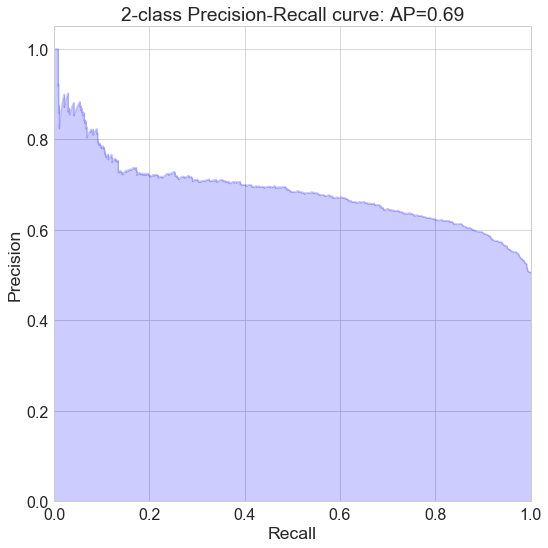

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall_gbm, precision_gbm, color='b', alpha=0.2,
         where='post')
ax.fill_between(recall_gbm, precision_gbm, step='post', alpha=0.2,
                 color='b')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_gbm))
fig.tight_layout()
fig.savefig('presentation_images/autoencoder_200k_nlatent100_PRAUC.pdf')

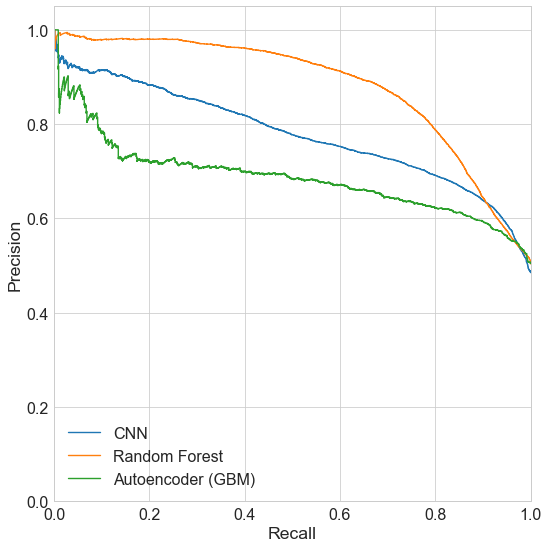

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.step(recall, precision, alpha=1,
         where='post', label='CNN')

ax.step(recall_rf, precision_rf, alpha=1,
         where='post', label='Random Forest')
ax.step(recall_gbm, precision_gbm, alpha=1,
         where='post', label='Autoencoder (GBM)')
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_ylim([0.0, 1.05])
ax.set_xlim([0.0, 1.0])
#ax.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
#          average_precision))
fig.tight_layout()
fig.savefig('presentation_images/RF_vs_8Conv_vs_GBM_sgd_PRAUC.pdf')